In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.integrate import quad

import lilguys as lguys
from lilguys import units as lu
import arya
from glob import glob as glob


In [76]:
filenames = glob("../models/twobody/out/snapshot*.hdf5")
Nf = len(filenames)
print(Nf)

101


In [79]:
E = pd.read_csv("../models/twobody/out/energy.txt", delimiter="\s+", header=None)

In [81]:
t = E[0]

In [83]:
snap_i.header

{'BoxSize': 30.0,
 'Git_commit': '1354be74e62b06e160d23f4e1559454948cd81de',
 'Git_date': 'Thu Oct 19 22:59:20 2023 +0100',
 'MassTable': array([0., 1.]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([0, 2], dtype=uint64),
 'NumPart_Total': array([0, 2], dtype=uint64),
 'Redshift': 0.0,
 'Time': 7.5}

In [59]:
snap_i = lguys.Snapshot.file(filenames[1])
snap_f = lguys.Snapshot.file(filenames[-1])

In [94]:
for i in snap_i.potential:
    print(i)

-0.6194789
-0.6194789


In [84]:
xs = np.empty((2, Nf, 3))
vs = np.empty((2, Nf, 3))
pot = np.empty((2, Nf))
t = np.empty(Nf)


for i in range(Nf):
    snap = lguys.Snapshot.file(filenames[i])
    for j in snap.IDs:
        xs[j, i] = snap.pos[j]
        vs[j, i] = snap.vel[j]
        pot[j,i] = snap.potential[j]
    t[i] = snap.header["Time"]

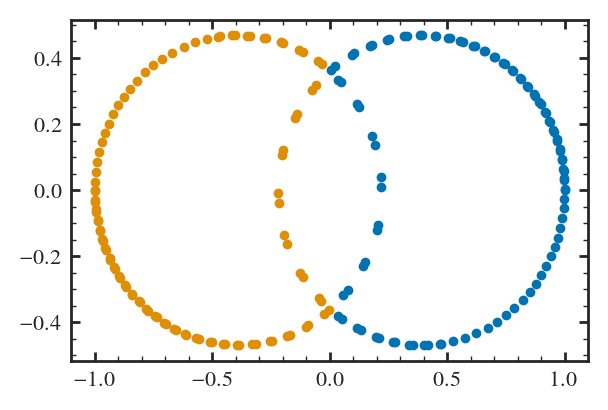

In [85]:
plt.scatter(xs[0,:,0], xs[0,:,1])
plt.scatter(xs[1,:,0], xs[1,:,1])


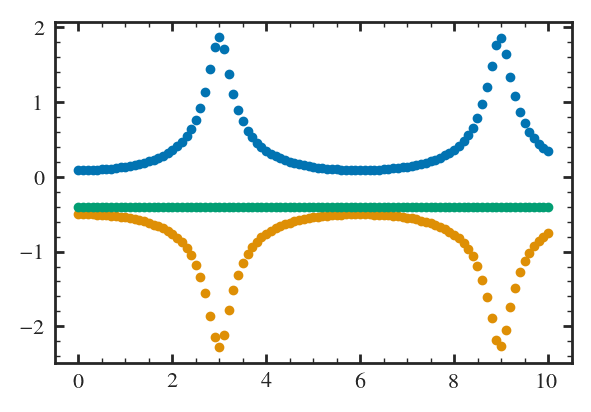

In [87]:
ke = snap_i.m * np.sum(vs**2, axis=2)

te = ke + pot

j = 1
plt.scatter(t, ke[j,:])
plt.scatter(t, pot[j,:])
plt.scatter(t, te[j,:])

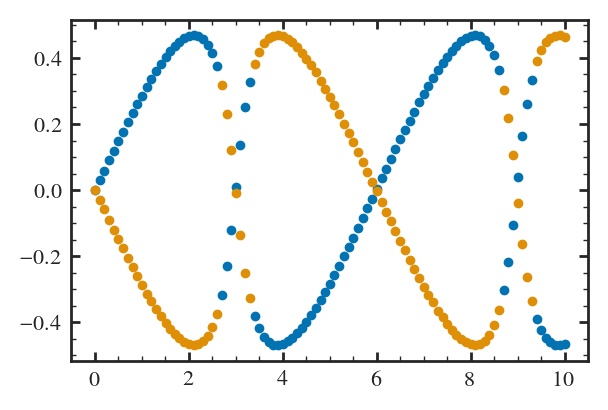

In [99]:
plt.scatter(t, xs[0,:,1])
plt.scatter(t, xs[1,:,1])


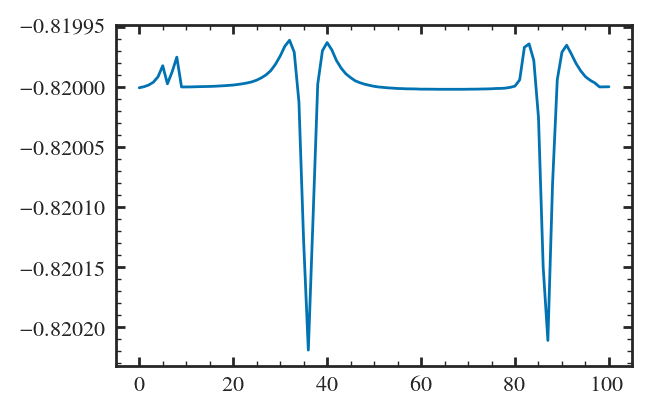

In [75]:
plt.plot(np.sum(te, axis=0))

In [76]:
filenames = glob("../models/twobody/out/snapshot*.hdf5")
Nf = len(filenames)
print(Nf)

101


In [79]:
E = pd.read_csv("../models/twobody/out/energy.txt", delimiter="\s+", header=None)

In [81]:
t = E[0]

In [83]:
snap_i.header

{'BoxSize': 30.0,
 'Git_commit': '1354be74e62b06e160d23f4e1559454948cd81de',
 'Git_date': 'Thu Oct 19 22:59:20 2023 +0100',
 'MassTable': array([0., 1.]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([0, 2], dtype=uint64),
 'NumPart_Total': array([0, 2], dtype=uint64),
 'Redshift': 0.0,
 'Time': 7.5}

In [59]:
snap_i = lguys.Snapshot.file(filenames[1])
snap_f = lguys.Snapshot.file(filenames[-1])

In [94]:
for i in snap_i.potential:
    print(i)

-0.6194789
-0.6194789


In [84]:
xs = np.empty((2, Nf, 3))
vs = np.empty((2, Nf, 3))
pot = np.empty((2, Nf))
t = np.empty(Nf)


for i in range(Nf):
    snap = lguys.Snapshot.file(filenames[i])
    for j in snap.IDs:
        xs[j, i] = snap.pos[j]
        vs[j, i] = snap.vel[j]
        pot[j,i] = snap.potential[j]
    t[i] = snap.header["Time"]

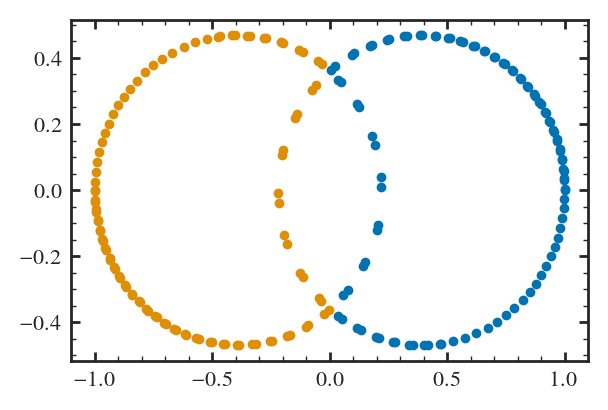

In [85]:
plt.scatter(xs[0,:,0], xs[0,:,1])
plt.scatter(xs[1,:,0], xs[1,:,1])


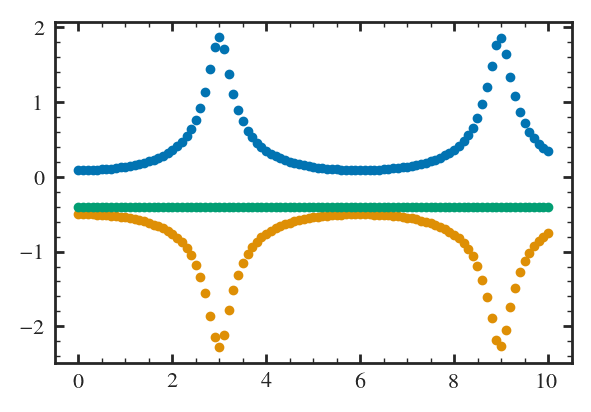

In [87]:
ke = snap_i.m * np.sum(vs**2, axis=2)

te = ke + pot

j = 1
plt.scatter(t, ke[j,:])
plt.scatter(t, pot[j,:])
plt.scatter(t, te[j,:])

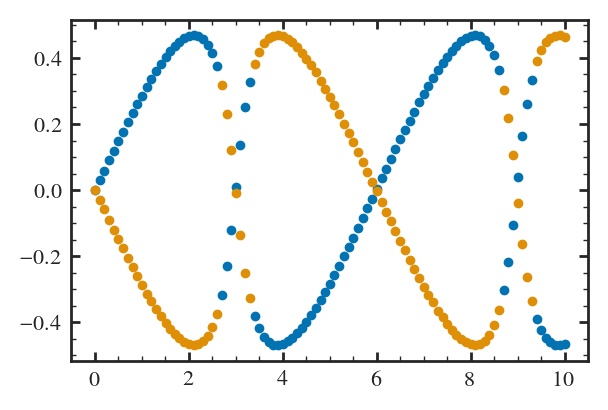

In [99]:
plt.scatter(t, xs[0,:,1])
plt.scatter(t, xs[1,:,1])


# Threebody

In [110]:
filenames = glob("../models/threebody/out/snapshot*.hdf5")
Nf = len(filenames)
print(Nf)

101


In [111]:
Np = 3
xs = np.empty((Np, Nf, 3))
vs = np.empty((Np, Nf, 3))
pot = np.empty((Np, Nf))
t = np.empty(Nf)


for i in range(Nf):
    snap = lguys.Snapshot.file(filenames[i])
    for j in snap.IDs:
        xs[j, i] = snap.pos[j]
        vs[j, i] = snap.vel[j]
        pot[j,i] = snap.potential[j]
    t[i] = snap.header["Time"]

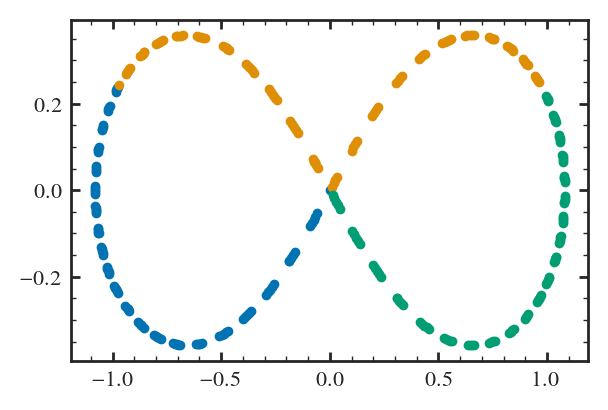

In [112]:
plt.scatter(xs[0,:,0], xs[0,:,1])
plt.scatter(xs[1,:,0], xs[1,:,1])
plt.scatter(xs[2,:,0], xs[2,:,1])

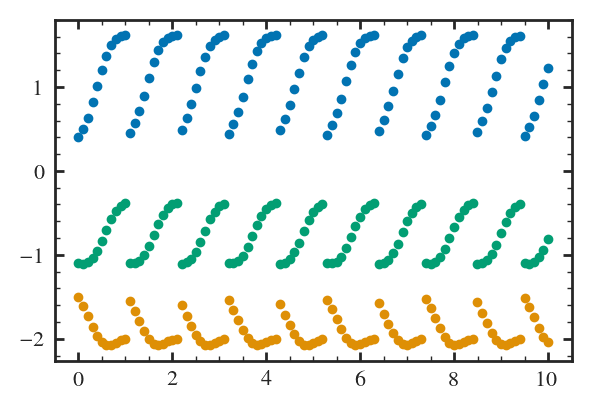

In [113]:
ke = snap_i.m * np.sum(vs**2, axis=2)

te = ke + pot

j = 1
plt.scatter(t, ke[j,:])
plt.scatter(t, pot[j,:])
plt.scatter(t, te[j,:])

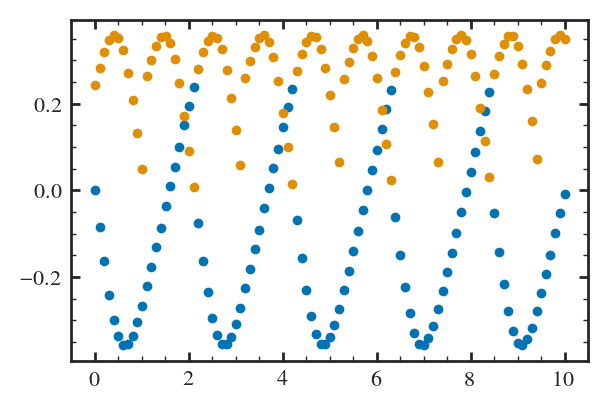

In [114]:
plt.scatter(t, xs[0,:,1])
plt.scatter(t, xs[1,:,1])


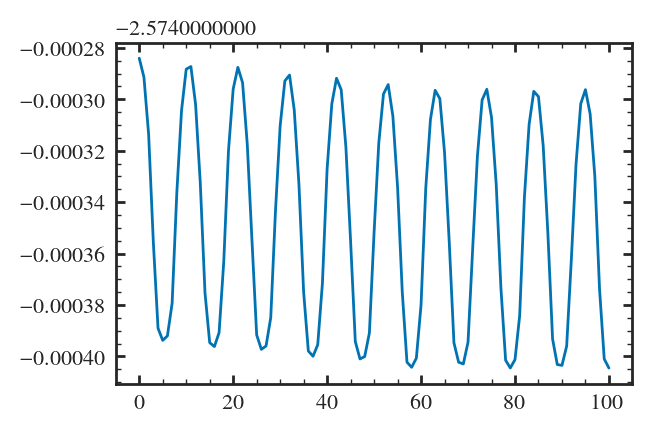

In [115]:
plt.plot(np.sum(te, axis=0))